In [5]:

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Data exploration
print(f"\n📊 Dataset Shape: {df.shape}")
print("\n🧾 First 5 Rows:")
display(df.head())



📊 Dataset Shape: (569, 31)

🧾 First 5 Rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# defining and labelling data prioritities
import numpy as np
# Custom priorities
# Based on the original data 0= malignant and this is indicated as high priority
#1=benign as this is indicated as low priority
df['priority'] = df['target'].map({0: 'high', 1: 'low'})
# Injecting a simulated 'medium' class to illustrate
medium_indices = np.random.choice(df.index[df['priority'] == 'low'], size=50, replace=False)
df.loc[medium_indices, 'priority'] = 'medium'


In [8]:
# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Train_test_split groups the data into training and testing sets
#Label-encoder converts the high, medium and low category into 0,1,2 numerical forms
# Encode target
# standardscaler standardizes data such that variables have a 0 to 1 standard deviation
le = LabelEncoder()
df['priority_encoded'] = le.fit_transform(df['priority'])

# Data labels and features
X = df[data.feature_names]
y = df['priority_encoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# training and evaluating the model: 
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy:", acc)
print("Classification Report:\n", report)


Accuracy: 0.8771929824561403
Classification Report:
               precision    recall  f1-score   support

        high       0.97      0.93      0.95        42
         low       0.82      0.98      0.90        62
      medium       0.00      0.00      0.00        10

    accuracy                           0.88       114
   macro avg       0.60      0.64      0.62       114
weighted avg       0.81      0.88      0.84       114



/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

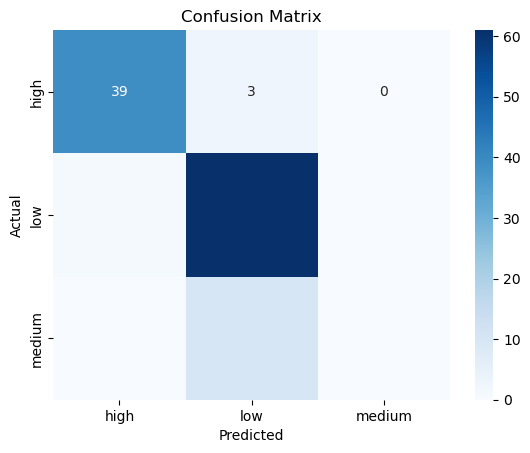

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# The above predictive model provides a priority prediction model based on breast cancer data
# The model treats benign tumours as low priority and malignant tunours as high priority
# Additionally, it simulates medium priority simulation
# A confusion matrix is effective analyzing how well a classification model performs based on actual labels and predicted labels
# Based on the confusion matric above the model was very correct in identifying high priority cases with 39/42 correct predictions.
# On the other hand, the model demonstrated mild confusion in low-priority with one mistake in 62 instances
# When it comes to medium priority, the model failed in recognizing  the medium class and all medium items were classified as low
# This can be attributed to inbalanced in class distribution and possible failures in learning distinguishing features